# Performance Report

## Prepare the Environment

* need to install dependencies
   * !pip install matplotlib
   * !pip install pandas
   * !pip install pixiedust
* if hit numpy issue, uninstall numpy then stop kernel
   * !pip uninstall -y numpy
*  For bokeh display issue
   * !pip install --upgrade --force-reinstall bokeh==0.12.6

In [1]:
import pixiedust;

Pixiedust database opened successfully


## Prepare the Data

In [2]:
from pyspark.sql import SQLContext
from pyspark.streaming import StreamingContext

sqlContext = SQLContext(sc)

In [3]:

# @hidden_cell
credentials_1 = {
  'cloudantUrl':'YOUR_URL',
  'user':'YOUR_USER',
  'password':"""YOUR_PASSWORD""",
  'database':'ycsb'
}


In [4]:
# @hidden_cell
df_all = sqlContext.read.format("org.apache.bahir.cloudant")\
.option("cloudant.host", credentials_1['cloudantUrl'])\
.option("cloudant.username", credentials_1['user'])\
.option("cloudant.password",credentials_1['password'])\
.load(credentials_1['database'])
df_all.printSchema();
df_all.show();

root
 |-- Latency: long (nullable = true)
 |-- Read_95th: long (nullable = true)
 |-- Read_99th: long (nullable = true)
 |-- Read_Latency: double (nullable = true)
 |-- Read_Max_Latency: long (nullable = true)
 |-- Read_Min_Latency: long (nullable = true)
 |-- Read_Operations: long (nullable = true)
 |-- Read_Operations_Success: long (nullable = true)
 |-- Throughput: double (nullable = true)
 |-- Update_95th: long (nullable = true)
 |-- Update_99th: long (nullable = true)
 |-- Update_Latency: double (nullable = true)
 |-- Update_Max_Latency: long (nullable = true)
 |-- Update_Min_Latency: long (nullable = true)
 |-- Update_Operations: long (nullable = true)
 |-- Update_Operations_Success: long (nullable = true)
 |-- YCSB_DB: string (nullable = true)
 |-- YCSB_NOTES: string (nullable = true)
 |-- YCSB_OP: string (nullable = true)
 |-- YCSB_RUN_DATE: string (nullable = true)
 |-- YCSB_THREAD_COUNT: long (nullable = true)
 |-- YCSB_WORKLOAD: string (nullable = true)
 |-- [READ]- Return=O

In [5]:
# @hidden_cell
from pyspark.sql.types import *;
from pyspark.sql.functions import *;
df_converted = df_all.withColumn('YCSB_RUN_DATE', df_all['YCSB_RUN_DATE'].cast(TimestampType()))\
                     .withColumn('YCSB_RUN_DATE_Year', year('YCSB_RUN_DATE'))\
                     .withColumn('YCSB_RUN_DATE_Month', month('YCSB_RUN_DATE'))\
                     .withColumn('YCSB_RUN_DATE_Day', dayofmonth('YCSB_RUN_DATE'));

df_converted.printSchema();
df_converted.show(2);

root
 |-- Latency: long (nullable = true)
 |-- Read_95th: long (nullable = true)
 |-- Read_99th: long (nullable = true)
 |-- Read_Latency: double (nullable = true)
 |-- Read_Max_Latency: long (nullable = true)
 |-- Read_Min_Latency: long (nullable = true)
 |-- Read_Operations: long (nullable = true)
 |-- Read_Operations_Success: long (nullable = true)
 |-- Throughput: double (nullable = true)
 |-- Update_95th: long (nullable = true)
 |-- Update_99th: long (nullable = true)
 |-- Update_Latency: double (nullable = true)
 |-- Update_Max_Latency: long (nullable = true)
 |-- Update_Min_Latency: long (nullable = true)
 |-- Update_Operations: long (nullable = true)
 |-- Update_Operations_Success: long (nullable = true)
 |-- YCSB_DB: string (nullable = true)
 |-- YCSB_NOTES: string (nullable = true)
 |-- YCSB_OP: string (nullable = true)
 |-- YCSB_RUN_DATE: timestamp (nullable = true)
 |-- YCSB_THREAD_COUNT: long (nullable = true)
 |-- YCSB_WORKLOAD: string (nullable = true)
 |-- [READ]- Retur

In [6]:
total_records = df_converted.count() 
print 'total records:', total_records
df_converted.createOrReplaceTempView("ycsb_performance")

total records: 17


## Reports

### Throughput 

In [11]:
df_1 = sqlContext.sql(""" select YCSB_WORKLOAD as Workload, operationcount as OperationCount, db_driver, YCSB_THREAD_COUNT as ThreadCount, count(1) TotalRun, avg(Throughput) Throughput, avg(Read_Latency) ReadLatency, avg(Update_Latency) UpdateLatency, avg(Read_95th) Read95th, avg(Read_99th) Read99th, avg(Update_95th) Update95th, avg(Update_99th) Update99th from ycsb_performance group by YCSB_WORKLOAD, operationcount, db_driver, YCSB_THREAD_COUNT order by YCSB_WORKLOAD, operationcount, db_driver, YCSB_THREAD_COUNT """);
df_1.show(2)

+---------+--------------+--------------------+-----------+--------+-----------------+-----------------+-----------------+------------------+------------------+-----------------+------------------+
| Workload|OperationCount|           db_driver|ThreadCount|TotalRun|       Throughput|      ReadLatency|    UpdateLatency|          Read95th|          Read99th|       Update95th|        Update99th|
+---------+--------------+--------------------+-----------+--------+-----------------+-----------------+-----------------+------------------+------------------+-----------------+------------------+
|workloada|          5000|com.mysql.jdbc.Dr...|          2|       8|378.3012462500001|      2396.330175|     6881.6008875|            2806.0|            3500.5|           8077.0|           13454.0|
|workloada|          5000|com.mysql.jdbc.Dr...|          4|       3|         679.3038|2396.868933333333|6390.196866666666|2707.6666666666665|3366.3333333333335|8112.333333333333|17025.666666666668|
+---------


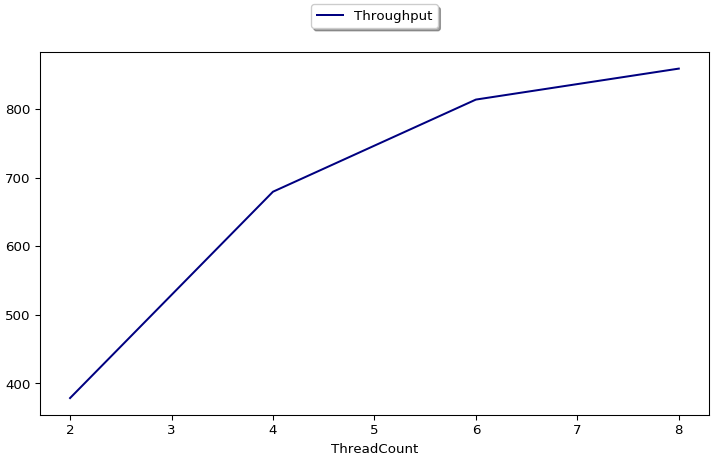

In [ ]:
display(df_1)


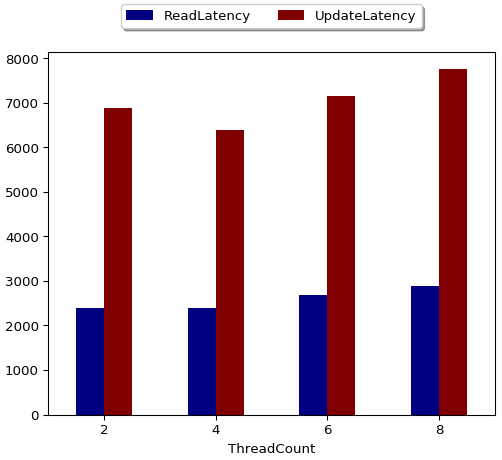

In [13]:
display(df_1);


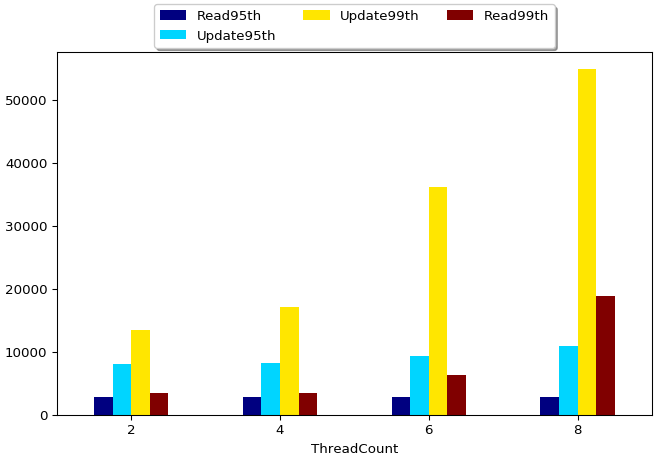

In [14]:
display(df_1);